In [1]:
#importing the Libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('insurance_pre.csv')
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
datasets=pd.get_dummies(dataset,drop_first=True)
datasets

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [4]:
indep=datasets[['age','bmi', 'children','sex_male', 'smoker_yes']]
dep=datasets[['charges']]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)

In [6]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='friedman_mse',max_features='auto',splitter='random')
regressor=regressor.fit(X_train,y_train)



C:\Users\admin\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [7]:
y_pred=regressor.predict(X_test)
y_pred

array([ 9386.1613  ,  8930.93455 , 46151.1245  , 13143.33665 ,
        9264.797   ,  3260.199   ,  1615.7667  , 10560.4917  ,
        6571.544   ,  3659.346   ,  7228.21565 ,  9861.025   ,
        7345.7266  ,  4571.41305 , 35147.52848 , 10600.5483  ,
       12142.5786  ,  3292.52985 ,  6082.405   , 35595.5898  ,
       24869.8368  , 13430.265   ,  9625.92    , 24535.69855 ,
        1391.5287  , 18963.17192 ,  3161.454   ,  8252.2843  ,
        3757.8448  ,  8968.33    ,  8252.2843  , 48673.5588  ,
       13555.0049  , 20781.48892 , 15359.1045  ,  3554.203   ,
        7740.337   , 38282.7495  , 39983.42595 ,  1880.07    ,
        4992.3764  ,  2866.091   , 19040.876   , 46661.4424  ,
       36307.7983  ,  3579.8287  , 11015.1747  ,  6389.37785 ,
        4719.52405 , 12032.326   , 13126.67745 ,  2331.519   ,
       24915.22085 , 58571.07448 , 12235.8392  ,  2689.4954  ,
        2897.3235  , 25992.82104 ,  7441.501   , 12142.5786  ,
        1252.407   , 47291.055   , 14007.222   , 25333.

In [8]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [9]:
r_score

0.7328248229117981

In [10]:
regressor.feature_importances_

array([0.148207  , 0.21902325, 0.02671334, 0.01735953, 0.58869687])

In [11]:
regressor.max_features_

5

In [12]:
regressor.tree_

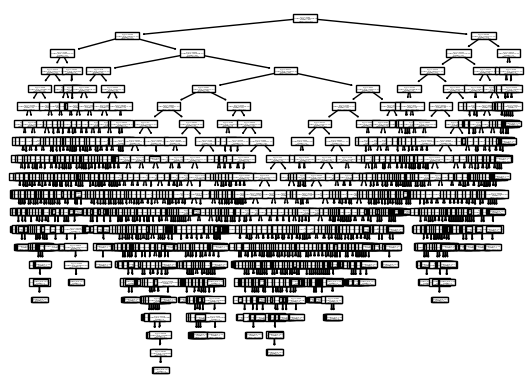

In [13]:
from sklearn import tree
tree.plot_tree(regressor)
plt.show()